In [1]:
import mammoth
from IPython.core.display import display, HTML
import subprocess
import os
import glob
import string
import stat
import random
from bs4 import BeautifulSoup
import re

In [2]:
def stripInfo(soup):
    regExpList = [r'Coffman', r'149 Atlantic',r'Swampscott',r'\$\d*\.\d\d']
    for thisRegExp in regExpList:
        for elem in soup(text=re.compile(thisRegExp)):
            elem.parent.decompose()
            
def stripImages(soup):
    while soup.img:
        soup.img.decompose()

In [4]:
# CONVERT TO All TO HTML WITH MAMMOTH AND STRIP OUT IMAGES TO SAVE SPACE
allDocFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*.docx"
writeDir =  "/Users/mettinger/Desktop/rockArtProjectData/html/"
allFiles = glob.glob(allDocFilesGlob, recursive=True)

errorFiles = []
errorCount = 0

for thisFile in allFiles:
    try:
        with open(thisFile, "rb") as docx_file:
            result = mammoth.convert_to_html(docx_file)
            html = result.value # The generated HTML
            soup = BeautifulSoup(html, 'html.parser')
            stripImages(soup)
            html = str(soup)
        thisFileName = os.path.basename(thisFile)[0:-5] + ".html"
        with open(writeDir + thisFileName, "w") as thisHtmlFile:
            thisHtmlFile.write(str(html))
    except:
        errorCount += 1
        print(errorCount)
        errorFiles.append(thisFile)
        

1
2
3
4
5
6
7
8
9



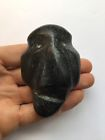
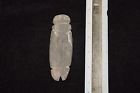
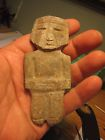
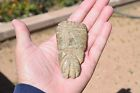
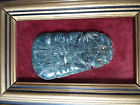
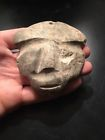
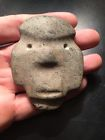
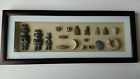
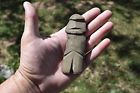

In [271]:
display(HTML(html))

In [17]:
# CONVERT FROM DOC TO DOCX SO MAMMOTH CAN CONVERT TO HTML
allDocFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/blockOne/**/*.doc"
allFiles = glob.glob(allDocFilesGlob, recursive=True)

docxFiles = []
for filename in allFiles:
    os.chdir('/'.join(filename.split('/')[0:-1]))
    if filename.endswith('.doc'):
        print(filename)
        docxFiles.append(filename)
        subprocess.call(['/Applications/LibreOffice.app/Contents/MacOS/soffice', '--headless', '--convert-to', 'docx', filename])

/Users/mettinger/Desktop/rockArtProject/blockOne/case1/Case 1-Eur-France- Le Grand Pressigny-Axe-Unifacial-Acheulian-Lower Paleo-250,000 BP.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case1/Case 1-ME-Syria, Golan Heights, Berekhat Ram, Venus, 800,000-230,000 BP.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case1/Case 1-Eur-Czech Republic-Dolní Věstonice-Wishbone Venus.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case1/Case 1-Eur-Czech Republic, Dolní Věstonice-Venus-Clay-29-25 kya.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case1/Case 1-Afr-Tanzania-Olduvai Gorge-Oldowan Culture-Pebble Tools-1.5 mya.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case1/Case 1-Eur-France-Dordogne-Flint Core and 14 blades- Magdalenean-17,000 BP.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case1/Case 1-Eur-France- Le Grand-Pressigny-Homo Erectus- Lower Acheulean 600 kya.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case1/Case 1-Eur-Czech Republic, Morav

/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Hongshan-Cong-Jade-2 Tier.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Hongshan-Cloud Shape-Sickle Center-Jade-4700-2900 BCE-15 cm.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Mirrors-needing translations.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Qijia-Cong-8 Tier-Black Jade-height 1.8 in..doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Liangzhu-Cong-Eight Tier-Jade-ca 2250 BCE.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-China-Yama, bronze casting, T'ang dynasty.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Yangshao Culture-Pan shan Phase (平山)-Mortuary Amphora-Terracotta-2750-2250 BCE.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-Japan-Jomon-Late Stage- Anthropomorphic--1000-300 BCE.doc
/Users/mettinger/Desktop/

/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Mirror-Book/~Asia-China-Mirror-Tang- Seven Lions and Grapes Mirror.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Mirror-Book/~Asia-China-Mirror-Warring States (475-221 BCE)-Arc 8-Inscription 12 character.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Mirror-Book/~Asia-China-Mirror-Han-Four bat and mice with continuous arc.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Mirror-Book/~Asia-China-Mirror-W. Han-TLV-Eight figures, 8 and12 Boss.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Mirror-Book/~Asia-China-Mirror- Han-Ch'ien Chi'iu-Thousand Autumns.doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Mirror-Book/~Asia-China Mirror-E. Han-Four Dragons-Changsha-Chengdu Prov..doc
/Users/mettinger/Desktop/rockArtProject/blockOne/case5/Case 5-Asia-China-Mirror-Book/rc-mirrors/

In [26]:
# REMOVE ALL OLD DOCS (WE'VE CONVERTED ALL TO DOCX)
allDocFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*.doc"
allFiles = glob.glob(allDocFilesGlob, recursive=True)

for filename in allFiles:
    os.remove(filename)

In [252]:
# MOVE ALL TILDA FILES
allDocFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/~*"
allFiles = glob.glob(allDocFilesGlob, recursive=True)

for filename in allFiles:
    print(filename)
    os.remove(filename)

In [38]:
# FIND NON-DOCX
allDocFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*"
allFiles = glob.glob(allDocFilesGlob, recursive=True)

for filename in allFiles:
    if not filename.endswith("docx"):
        print(filename)

/Users/mettinger/Desktop/rockArtProject/blockTwo
/Users/mettinger/Desktop/rockArtProject/blockOne
/Users/mettinger/Desktop/rockArtProject/blockThree
/Users/mettinger/Desktop/rockArtProject/tilda
/Users/mettinger/Desktop/rockArtProject/blockTwo/case14
/Users/mettinger/Desktop/rockArtProject/blockTwo/case13
/Users/mettinger/Desktop/rockArtProject/blockTwo/case12
/Users/mettinger/Desktop/rockArtProject/blockTwo/case15
/Users/mettinger/Desktop/rockArtProject/blockTwo/TEXTILES-Am,S-Textiles
/Users/mettinger/Desktop/rockArtProject/blockTwo/case8
/Users/mettinger/Desktop/rockArtProject/blockTwo/case9
/Users/mettinger/Desktop/rockArtProject/blockTwo/case7
/Users/mettinger/Desktop/rockArtProject/blockTwo/README.md
/Users/mettinger/Desktop/rockArtProject/blockTwo/case10
/Users/mettinger/Desktop/rockArtProject/blockTwo/case17
/Users/mettinger/Desktop/rockArtProject/blockTwo/case19
/Users/mettinger/Desktop/rockArtProject/blockTwo/caseFossil
/Users/mettinger/Desktop/rockArtProject/blockTwo/case18
/

In [53]:
# DELETE GARBAGE
allDocFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*"
allFiles = glob.glob(allDocFilesGlob, recursive=True)

for filename in allFiles:
    try:
        if (os.path.isdir(filename) and len(os.listdir(filename)) == 0) or filename.endswith("jpg") or filename.endswith("JPG") or filename.endswith("db") or filename.endswith("pdf") or filename.endswith("rtf"):
            os.remove(filename)
            print(filename)
    except:
        print(filename)

In [240]:
#filename='/Users/mettinger/Desktop/rockArtProjectData/blockTwo/case13/Case 13-US-SECC-Shell Gorgets.docx'
index = random.randint(0,len(badFiles))
index = 80
print(index)
filename = badFiles[index]
with open(filename, "rb") as docx_file:
    result = mammoth.convert_to_html(docx_file)
    html = result.value # The generated HTML

80


"Taino water Jar of clay with a monky faces each side and special details( 231878750286 )Estimated delivery Tue, May 10 - Thu, May 26Tracking number: Tracking numberRR150051415DOAdd note",ITEM PRICE:US $299.00,

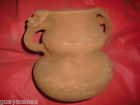

In [241]:
display(HTML(html))

In [242]:
soup = BeautifulSoup(html, 'html.parser')

In [244]:
stripInfo(soup)

"Taino water Jar of clay with a monky faces each side and special details( 231878750286 )Estimated delivery Tue, May 10 - Thu, May 26Tracking number: Tracking numberRR150051415DOAdd note",ITEM PRICE:,

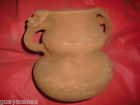

In [245]:
display(HTML(str(soup)))

In [247]:
# DELETE SENSITIVE INFORMATION (ADDRESS, ORDER INFO, ETC....)
allDocFilesGlob = "/Users/mettinger/Desktop/rockArtProjectData/**/*.docx"
allFiles = glob.glob(allDocFilesGlob, recursive=True)
convertErrors = []
regExErrors = []

for filename in allFiles:
    with open(filename, "rb") as docx_file:
        try:
            result = mammoth.convert_to_html(docx_file)
            html = result.value
            soup = BeautifulSoup(html, 'html.parser')
            try:
                regExpList = [r'Coffman', r'149 Atlantic',r'Swampscott',r'\$\d*\.\d\d']
                stripInfo(soup)
            except:
                regExErrors.append(filename)
        except:
            convertErrors.append(filename)
    
    

In [249]:
regExErrors

['/Users/mettinger/Desktop/rockArtProjectData/blockThree/misc/AM MIRRORS-Ebay-2012-May.docx']

In [ ]:
'''
LOST FILES!!!!!!


AM000-Asia-Japan-Edo-Five Lions-Six Birds and Grapes.docx 
Case Fossil-US-FL-Compendium.docx
AM000-Asia-bJapan-Mirror-Edo-Lion and Grapes.docx          
Fossil-US-FL-Compendium.docx
'''